Our training data is 59k, validation is 1k, and testing data is 10k

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np

USE_GPU = False # Change to True when using UCSD Datahub
dtype = torch.float32 # We will be using float throughout this tutorial.

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss.
print_every = 100
print('using device:', device)

using device: cpu


In [2]:
NUM_TRAIN = 59000

transform = T.Compose([
                T.ToTensor(),
                T.Normalize((0.5,), (0.5,))
            ])

fashion_train = dset.FashionMNIST('datasets', train=True, download=True,
                             transform=transform)
loader_train = DataLoader(fashion_train, batch_size=64, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

fashion_val = dset.FashionMNIST('datasets', train=True, download=True,
                           transform=transform)
loader_val = DataLoader(fashion_val, batch_size=64, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 60000)))

fashion_test = dset.FashionMNIST('datasets', train=False, download=True, 
                            transform=transform)
loader_test = DataLoader(fashion_test, batch_size=64)

Visualizing some of the images (randomly):

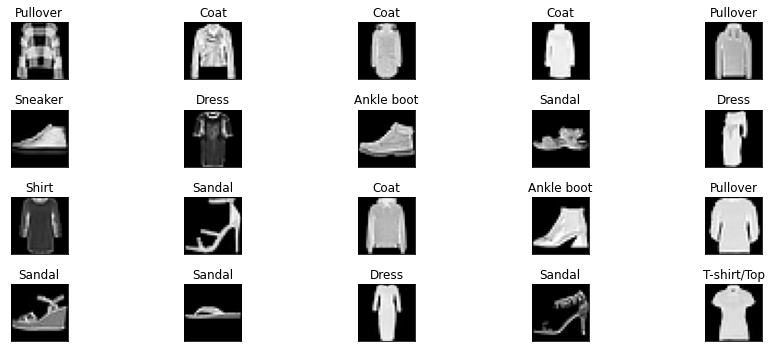

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def label_to_name(l):
    labels = ['T-shirt/Top', 'Trouser', 'Pullover', \
              'Dress', 'Coat', 'Sandal', 'Shirt', \
              'Sneaker', 'Bag', 'Ankle boot']
    return labels[l]

dataiter = iter(loader_train)
images, labels = dataiter.next()

fig = plt.figure(figsize=(15, 5))
for idx in range(20):
    ax = fig.add_subplot(4, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(label_to_name(labels[idx].item()))
    fig.tight_layout()

In [4]:
print('Images data dimension:', images.size())
print('Labels dimension:', labels.size())

Images data dimension: torch.Size([64, 1, 28, 28])
Labels dimension: torch.Size([64])


Note: Don't get confused. The `64` is due to we're specifying `batch_size=64` in the DataLoader. So, the loader, `loader_train`, loads 64 images, each of size 28x28 pixels (1 instead of 3 because it's not RGB)

### __Model definition & Training Loop (AREEZ)__

In [5]:
def train(model, optimizer, epochs=1):
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            # x: img, y: label
            
            # put model to training mode
            # because layers like dropout, batchnorm, etc. performs
            # differently in training and testing mode.
            model.train()  

            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device)

            scores = model(x)
            loss = F.cross_entropy(scores, y) # Change this maybe use MSELoss()?

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_part34(loader_val, model)
                print()

In [6]:
# Hyperparameters (if any)
# momentum = 0.9
# learning_rate = 1e-2

In [7]:
# model = None
# optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, nesterov=True)
# train(model, optimizer)

### __Model Testing (Behraud)__